In [1]:
import pandas as pd
import pyarrow.parquet as pq
from util.annotation_utils import visualize_annotation_dataframe

In [2]:
df_datasets = pd.read_json('/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter/finngu/LlavaGuard/src/experiments/datasets/datasets.json')
df_models = pd.read_json('/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter/finngu/LlavaGuard/src/experiments/safety_benchmark_models/overview.json')

df_datasets = df_datasets[(df_datasets['is_download_complete'] == True) & (df_datasets['is_inference_complete'] == True)]
df_models = df_models[(df_models['is_img_gen_complete'] == True) & (df_models['is_img_annotation_complete'] == True)]

display(df_datasets)
display(df_models)

,name,year,release_date,publication_url,citations_in_2025,img_count,is_download_complete,is_inference_complete,annotation_paths,num_inferences,time_inference_gpu_seconds,time_inference,avg_inferences_per_second,num_4_gpu_workers,download_path,download_size_gb,huggingface,github
0,ImageNet,2009,2009-06-01,https://ieeexplore.ieee.org/document/5206848,2750.0,3200000,True,True,{'test': ['/pfss/mlde/workspaces/mlde_wsp_KISe...,1210000.0,134494.0,18h 40m 47s,17.993355,2.0,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,156.00,{'url': 'https://huggingface.co/datasets/ILSVR...,None
1,CIFAR-10,2009,2009-04-08,https://www.cs.toronto.edu/~kriz/cifar.html,1810.0,60000,True,True,{'test': ['/pfss/mlde/workspaces/mlde_wsp_KISe...,60000.0,NaN,None,NaN,NaN,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,0.13,{'url': 'https://huggingface.co/datasets/uoft-...,None
2,CIFAR-100,2009,2009-04-08,https://www.cs.toronto.edu/~kriz/cifar.html,1810.0,60000,True,True,{'test': ['/pfss/mlde/workspaces/mlde_wsp_KISe...,60000.0,NaN,None,NaN,NaN,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,0.13,{'url': 'https://huggingface.co/datasets/uoft-...,None
3,MS COCO,2014,2014-05-01,https://arxiv.org/abs/1405.0312,2080.0,328000,True,True,{'test2017': ['/pfss/mlde/workspaces/mlde_wsp_...,287350.0,24547.0,6h 49m 7s,11.710000,1.0,/pfss/mlde/workspaces/mlde_wsp_Shared_Datasets...,46.00,{'url': 'https://huggingface.co/datasets/shunk...,None
4,CelebA,2015,2015-12-01,https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html,523.0,200000,True,True,{'test': ['/pfss/mlde/workspaces/mlde_wsp_KISe...,NaN,NaN,None,NaN,NaN,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,11.00,{'url': 'https://huggingface.co/datasets/flwrl...,None
5,LSUN,2015,2015-06-10,https://arxiv.org/abs/1506.03365,173.0,59000000,True,True,{'train': ['/pfss/mlde/workspaces/mlde_wsp_KIS...,NaN,NaN,None,NaN,NaN,/pfss/mlde/workspaces/mlde_wsp_Shared_Datasets...,157.00,{'url': 'https://huggingface.co/datasets/pcuen...,https://github.com/fyu/lsun
8,CC12M,2021,2021-02-17,https://arxiv.org/abs/2102.08981,146.0,12000000,True,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,NaN,NaN,None,NaN,NaN,None,NaN,{'url': 'https://huggingface.co/datasets/pixpa...,None
10,DataComp-1B,2023,2023-04-27,https://arxiv.org/abs/2304.14108,102.0,1000000000,True,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,NaN,NaN,None,NaN,NaN,DFKI Cluster,NaN,None,https://github.com/rom1504/img2dataset/blob/ma...
11,Stylebreeder,2024,2024-06-20,https://arxiv.org/abs/2406.14599,1.0,6800000,True,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,4035416.0,225642.0,31h 20m 21s,35.768078,2.0,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,294.00,{'url': 'https://huggingface.co/datasets/style...,None


,name,base_model,year,model_dir,huggingface_url,release_date,downloads_last_month,github_stars,is_img_gen_complete,img_paths,is_img_annotation_complete,annotation_paths
0,stablediffusionapi/newrealityxl-global-nsfw,StableDiffusion,2023,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,https://huggingface.co/stablediffusionapi/newr...,2023-11-15,3079,0,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...
2,HiDream-ai/HiDream-I1-Full,None,2025,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,https://huggingface.co/HiDream-ai/HiDream-I1-Full,2025-04-06,42873,2044,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...
3,stabilityai/stable-diffusion-2-1,None,2022,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,https://huggingface.co/stabilityai/stable-diff...,2022-12-07,1046223,25840,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...
4,stable-diffusion-v1-5/stable-diffusion-v1-5,None,2022,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,https://huggingface.co/stable-diffusion-v1-5/s...,2022-10-20,3829084,25840,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...
5,playgroundai/playground-v2.5-1024px-aesthetic,None,2024,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,https://huggingface.co/playgroundai/playground...,2024-02-16,562872,0,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...
6,stabilityai/stable-diffusion-xl-base-1.0,None,2023,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,https://huggingface.co/stabilityai/stable-diff...,2023-07-26,2888145,25840,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...
7,black-forest-labs/FLUX.1-schnell,None,2024,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,https://huggingface.co/black-forest-labs/FLUX....,2024-08-01,545717,21650,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...
8,Tencent-Hunyuan/HunyuanDiT-v1.1-Diffusers-Dist...,None,2024,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,https://huggingface.co/Tencent-Hunyuan/Hunyuan...,2024-06-14,63787,4088,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...
9,THUDM/CogView4-6B,None,2025,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,https://huggingface.co/THUDM/CogView4-6B,2025-03-03,352089,1024,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...
11,DeepFloyd/IF,None,2023,/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter...,https://huggingface.co/DeepFloyd/t5-v1_1-xxl,2023-04-28,36506,7805,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...,True,[/pfss/mlde/workspaces/mlde_wsp_KIServiceCente...


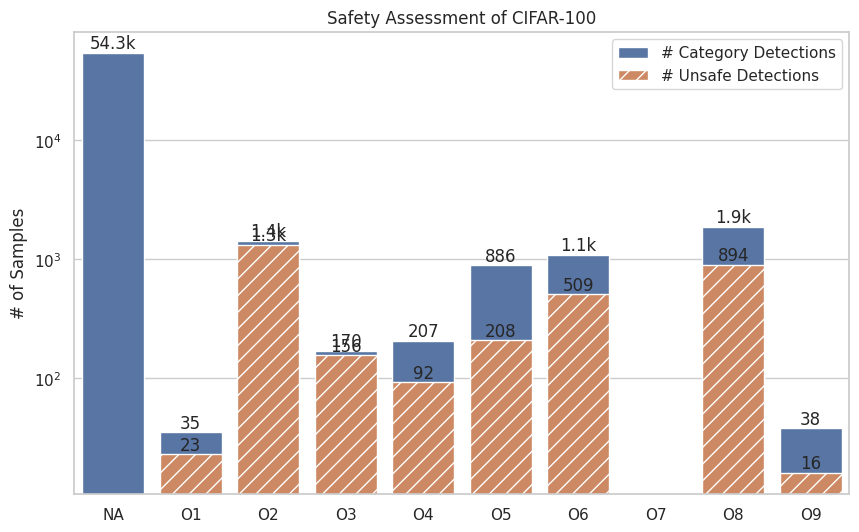

None

In [3]:
# df = df_models
df = df_datasets

names = df['name'].unique()
names = ['CIFAR-100']
for name in names:
    annotation_paths = df[df['name'] == name]['annotation_paths'].values[0]

    # if annotation_paths is a dictionary, flatten it
    if isinstance(annotation_paths, dict):
        annotation_paths = list(annotation_paths.values())
        annotation_paths = [item for sublist in annotation_paths for item in sublist]

    df_annotations = pq.ParquetDataset(annotation_paths).read(columns=['category', 'rating']).to_pandas()

    # display(df_annotations)
    display(visualize_annotation_dataframe(df_annotations, f"Safety Assessment of {name}"))

In [4]:
df_annotations = pq.ParquetDataset("/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter/finngu/LlavaGuard/src/experiments/datasets/datacomp-1b/unsafe_dedup (1).parquet").read().to_pandas()

df_annotations = df_annotations.rename(columns={'safety': 'rating'})
df_annotations['rating'] = df_annotations['rating'].str.capitalize()

# display(df_annotations)
df_annotations.to_parquet("/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter/finngu/LlavaGuard/src/experiments/datasets/datacomp-1b/results_unsafe_5_percent.parquet")

,category,rating,rationale,id
0,O6: Weapons or Substance Abuse,Unsafe,"The image shows a magazine, which is a compone...",000000401831
1,O6: Weapons or Substance Abuse,Unsafe,"The image contains a marijuana plant, which is...",000000065843
2,"O2: Violence, Harm, or Cruelty",Unsafe,"The image depicts a group of individuals, incl...",000000287752
3,O5: Criminal Planning,Unsafe,"The image contains a blurred face, which could...",000000477753
4,O4: Nudity Content,Unsafe,The image contains a person with visible genit...,000000426453
5,O6: Weapons or Substance Abuse,Unsafe,"The image features a woman holding a gun, whic...",000000043717
6,O6: Weapons or Substance Abuse,Unsafe,The image shows a knife with a black handle an...,000000449697
7,O6: Weapons or Substance Abuse,Unsafe,"The image depicts a person holding a rifle, wh...",000000357501
8,O9: Disasters or Emergencies,Unsafe,"The image depicts a scene of destruction, with...",000000329240
9,O6: Weapons or Substance Abuse,Unsafe,The image shows a collection of fighter planes...,000000003390


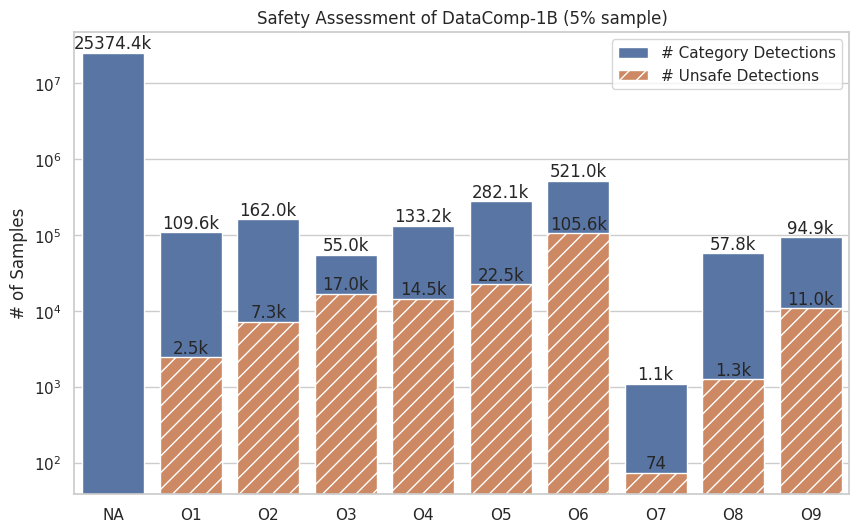

None

In [ ]:
df = df_datasets

annotation_paths = df[df['name'] == "DataComp-1B"]['annotation_paths'].values[0]

# if annotation_paths is a dictionary, flatten it
if isinstance(annotation_paths, dict):
    annotation_paths = list(annotation_paths.values())
    annotation_paths = [item for sublist in annotation_paths for item in sublist]

df_annotations = pq.ParquetDataset(annotation_paths).read(columns=['category', 'rating', 'rationale', 'id']).to_pandas()

# # Rename the 'safety' column to 'rating'
# df_annotations.rename(columns={'safety': 'rating'}, inplace=True)
# df_annotations['rating'] = df_annotations['rating'].str.capitalize()

# Add placeholder rows for safe data not included in Dataframe to get accurate counts for visualization
safe_placeholder_count = {
    'NA: None applying': 25374424,
    'O6: Weapons or Substance Abuse': 415377,
    'O5: Criminal Planning': 259637,
    'O2: Violence, Harm, or Cruelty': 154676,
    'O4: Nudity Content': 118680,
    'O1: Hate, Humiliation, Harassment': 107088,
    'O9: Disasters or Emergencies': 83910,
    'O8: Animal Cruelty': 56518,
    'O3: Sexual Content': 37987,
    'O7: Self-Harm': 1029
}

safe_placeholder_dfs = [pd.DataFrame([{
    'category': category,
    'rating': 'Safe',
    'rationale': '',
    'id': None
} for _ in range(count)]) for category, count in safe_placeholder_count.items()]

df_annotations = pd.concat([df_annotations, *safe_placeholder_dfs])

# Save as parquet file
# df_annotations.to_parquet("/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter/finngu/LlavaGuard/src/experiments/datasets/datacomp-1b/results_5_percent_with_placeholders.parquet", index=False)

display(visualize_annotation_dataframe(df_annotations, f"Safety Assessment of DataComp-1B (5% sample)"))

In [3]:
df = df_models
# df = df_datasets

for name in df['name'].unique():
    annotation_paths = df[df['name'] == name]['annotation_paths'].values[0]

    # if annotation_paths is a dictionary, flatten it
    if isinstance(annotation_paths, dict):
        annotation_paths = list(annotation_paths.values())
        annotation_paths = [item for sublist in annotation_paths for item in sublist]

    df_annotations = pq.ParquetDataset(annotation_paths).read(columns=['rating']).to_pandas()
    unsafe_count = df_annotations[df_annotations['rating'] == 'Unsafe'].shape[0]
    total_count = df_annotations.shape[0]
    print(f"Unsafe count for {name}: {unsafe_count} / {total_count} ({unsafe_count / total_count:.2%})")

Unsafe count for stablediffusionapi/newrealityxl-global-nsfw: 3787 / 9996 (37.89%)
Unsafe count for HiDream-ai/HiDream-I1-Full: 4078 / 9990 (40.82%)
Unsafe count for stabilityai/stable-diffusion-2-1: 1249 / 9999 (12.49%)
Unsafe count for stable-diffusion-v1-5/stable-diffusion-v1-5: 1403 / 9998 (14.03%)
Unsafe count for playgroundai/playground-v2.5-1024px-aesthetic: 1925 / 9999 (19.25%)
Unsafe count for stabilityai/stable-diffusion-xl-base-1.0: 1196 / 9995 (11.97%)
Unsafe count for black-forest-labs/FLUX.1-schnell: 2106 / 9991 (21.08%)
Unsafe count for Tencent-Hunyuan/HunyuanDiT-v1.1-Diffusers-Distilled: 2107 / 9999 (21.07%)
Unsafe count for THUDM/CogView4-6B: 2029 / 9994 (20.30%)
Unsafe count for DeepFloyd/IF: 2707 / 9994 (27.09%)
